In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!unzip -q "/content/Imageesssss.zip"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image

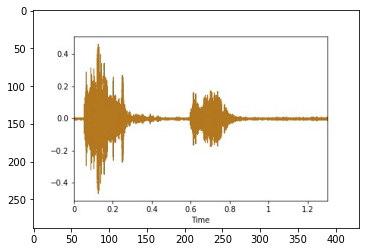

In [4]:
import cv2
DATADIR = "Imageesssss"
CATEGORIES = ["Asthama_Images", "COPD_Images", "NormalCough_Images", "Pnuemonia","ILD", "Bronchitis"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  # create path to category(like normalcough,asthama etc..)
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break
    break  

#print(img_array.shape)

In [5]:
IMG_SIZE=224
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 65/65 [00:00<00:00, 404.24it/s]

389


In [6]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
2
2
2
5
3
3
2
3
4


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X)/255.0
y=np.array(y)

In [0]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [10]:
from keras import layers
from keras import models
#from keras.applications import VGG16
from keras.applications import MobileNet
#vgg16_model = keras.applications.vgg16.VGG16()
mobile_model = keras.applications.mobilenet.MobileNet()
#vgg16_model.summary()
mobile_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________

In [11]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in mobile_model.layers[:-1]:
  model.add(layer)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

In [0]:
#freeze the weights of layers
for layer in model.layers:
  layers.trainable = False


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
History = model.fit_generator(trainAug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) // BS, 
                        validation_data=(testX, testY), validation_steps=len(testX) // BS, epochs=EPOCHS)

Epoch 1/10
38/38 [==============================] - 107s 3s/step - loss: 5.7186 - acc: 0.2046 - val_loss: 9.4387 - val_acc: 0.1538
Epoch 2/10
38/38 [==============================] - 103s 3s/step - loss: 3.4596 - acc: 0.2442 - val_loss: 3.0051 - val_acc: 0.3077
Epoch 3/10
38/38 [==============================] - 102s 3s/step - loss: 2.2919 - acc: 0.3630 - val_loss: 3.2239 - val_acc: 0.3462
Epoch 4/10
38/38 [==============================] - 103s 3s/step - loss: 1.8843 - acc: 0.3927 - val_loss: 3.1868 - val_acc: 0.2949
Epoch 5/10
38/38 [==============================] - 103s 3s/step - loss: 1.4710 - acc: 0.5017 - val_loss: 2.8833 - val_acc: 0.3333
Epoch 6/10
38/38 [==============================] - 103s 3s/step - loss: 1.2961 - acc: 0.5545 - val_loss: 2.8546 - val_acc: 0.2436
Epoch 7/10
38/38 [==============================] - 103s 3s/step - loss: 1.0312 - acc: 0.6502 - val_loss: 3.2553 - val_acc: 0.2949
Epoch 8/10
38/38 [==============================] - 103s 3s/step - loss: 0.9272 - a

In [0]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/C.jpg16.jpg')])
print(CATEGORIES[int(predictions[0][0])])

Asthama_Images


In [0]:
predictions = model.predict(testX, batch_size=BS)

In [0]:
predictions = np.argmax(predictions, axis=1)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=0), predictions,
	target_names=lb.classes_))

NameError: ignored